In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions

### 1] Relu

$\text{ReLU}(x) = \max(0, x) \$


In [2]:
# Define input tensor
a = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])

relu=tf.nn.relu(a)

print("Relu o/p : ",relu)

Relu o/p :  tf.Tensor([0. 0. 0. 1. 2.], shape=(5,), dtype=float32)


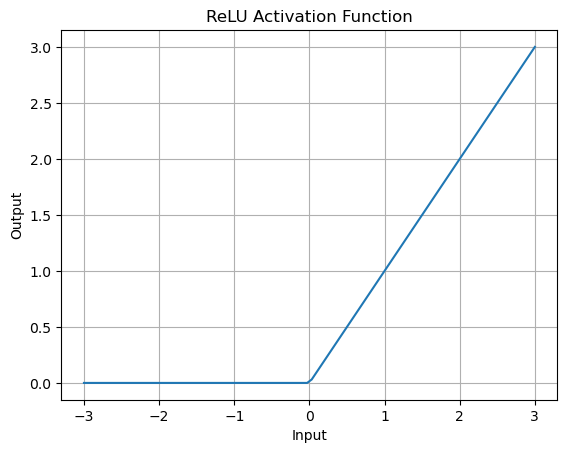

In [3]:
x=np.linspace(-3,3,100)
y=np.maximum(0,x) # formula

plt.plot(x,y)

plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

### 2] Sigmoid

$\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}} \$

In [4]:
# Define input tensor
a = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])

sig=tf.nn.sigmoid(a)

print("Softmax o/p : ",sig)

Softmax o/p :  tf.Tensor([0.11920292 0.26894143 0.5        0.7310586  0.8807971 ], shape=(5,), dtype=float32)


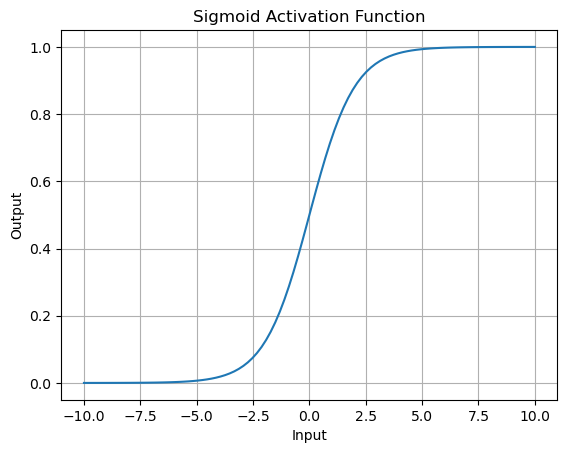

In [5]:
x=np.linspace(-10,10,100)
y=1/(1+np.exp(-1*x)) # formula

plt.plot(x,y)

plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

### 3] Softmax

$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} \$

In [6]:
# Define input tensor
a = tf.constant([2.0,1.0,0.1])

soft=tf.nn.softmax(a)

print("Softmax o/p : ",soft)

Softmax o/p :  tf.Tensor([0.6590012  0.24243298 0.09856589], shape=(3,), dtype=float32)


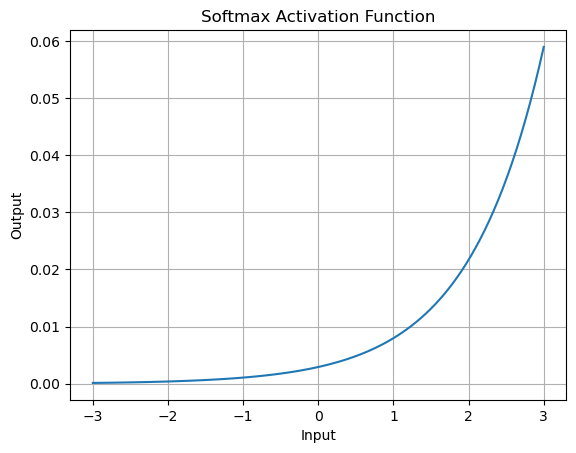

In [7]:
x=np.linspace(-3,3,100)
e=np.exp(x)
y=e/np.sum(e) # formula

plt.plot(x,y)

plt.title("Softmax Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

### 4] Tanh

$\text{Tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \$

In [8]:
# Define input tensor
a = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])

tanh=tf.nn.tanh(a)

print("Tanh o/p : ",tanh)

Tanh o/p :  tf.Tensor([-0.9640276 -0.7615942  0.         0.7615942  0.9640276], shape=(5,), dtype=float32)


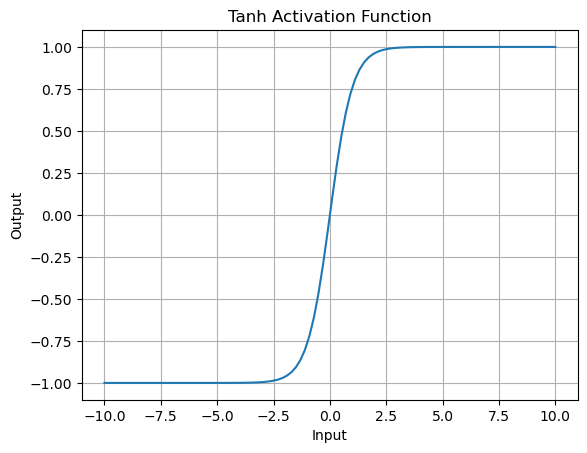

In [9]:
x=np.linspace(-10,10,100)

e_pos=np.exp(x)
e_neg=np.exp(-1*x)

y=(e_pos-e_neg)/(e_pos+e_neg) # formula

plt.plot(x,y)

plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

### 5] Leaky-relu

$\text{Leaky ReLU}(x) = \begin{cases} 
      x & \text{if } x \geq 0 \\
      \alpha x & \text{if } x < 0 
   \end{cases}
\$

In [10]:
# Define input tensor
a = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])

leaky=tf.nn.leaky_relu(a)

print("Leaky relu o/p : ",leaky)

Leaky relu o/p :  tf.Tensor([-0.4 -0.2  0.   1.   2. ], shape=(5,), dtype=float32)


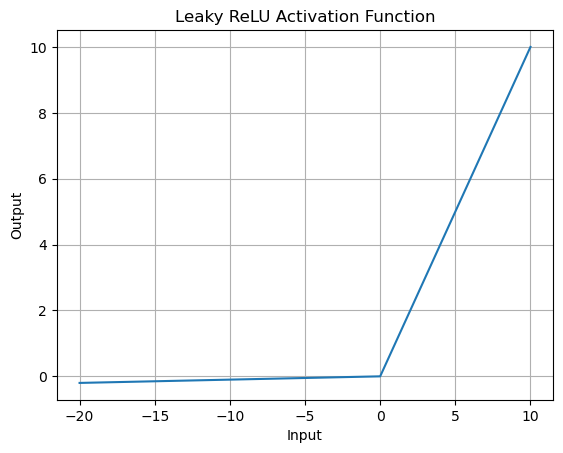

In [11]:
x = np.linspace(-20, 10, 100)
y = np.where(x >= 0, x, 0.01 * x)
plt.plot(x, y)
plt.title("Leaky ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

### 6] Elu

$\text{ELU}(x) = \begin{cases} 
      x & \text{if } x \geq 0 \\
      \alpha (e^x - 1) & \text{if } x < 0 
   \end{cases}
\$

In [12]:
# Define input tensor
a = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])

elu=tf.nn.elu(a)

print("Elu o/p : ",elu)

Elu o/p :  tf.Tensor([-0.86466473 -0.63212055  0.          1.          2.        ], shape=(5,), dtype=float32)


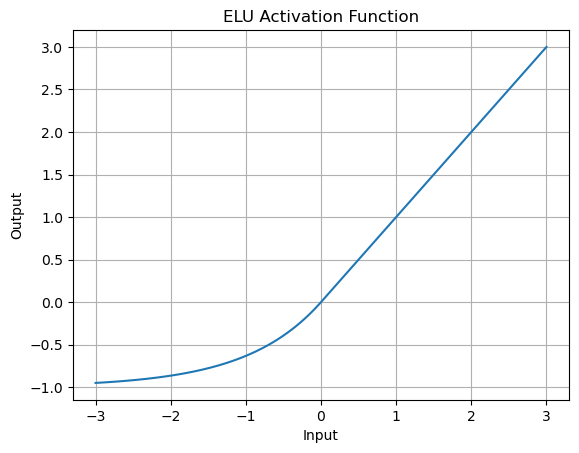

In [13]:
x = np.linspace(-3, 3, 100)
y = np.where(x >= 0, x, np.exp(x) - 1)
plt.plot(x, y)
plt.title("ELU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

# Loss functions

### 1] Sigmoid cross entropy

$\text{Sigmoid Cross-Entropy}(z, y) = - [\left( y \log(\sigma(z)) + (1 - y) \log(1 - \sigma(z)) \right) \]
where \( \sigma(z) = \frac{1}{1 + e^{-z}}) \$

where

     y : label
     
     z : prediction
     
     log : log base e

In [15]:
labels = tf.constant([0., 1., 0.])
predictions = tf.constant([0.2, 0.8, -0.5])

#loss
loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=labels,logits=predictions)

print("Signoid cross entropy loss = ",loss)

Signoid cross entropy loss =  tf.Tensor([0.79813886 0.37110066 0.474077  ], shape=(3,), dtype=float32)


### 2] Softmax cross entropy

$\text{Softmax Cross-Entropy}(z, y) = - \sum_{i=1}^C y_i \log\left(\frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}\right) \$

### Important points
1] This function expects the labels to be provided in a one-hot encoded format

2] For example:

    The one-hot encoded label vector [0, 1, 0] represents class 1.

    The one-hot encoded label vector [1, 0, 0] represents class 0.
    
    The one-hot encoded label vector [0, 0, 1] represents class 2.

In [22]:
labels = tf.constant([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
logits = tf.constant([[0.2, 0.7, 0.1], [0.9, 0.1, 0.0], [0.3, 0.4, 0.3]])
loss = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
print("Softmax Cross-Entropy Loss:", loss.numpy())

Softmax Cross-Entropy Loss: [0.7679496 0.618369  1.1330688]


### 3] Sparse softmax cross entropy

$\text{Sparse Softmax Cross-Entropy}(z, y) = - \log\left(\frac{e^{z_y}}{\sum_{j=1}^C e^{z_j}}\right) \$

### Important points
1] This function is used when the labels are provided as integer indices of the true class, rather than one-hot encoded vectors.

2] For example :

        1  means class 1
        
        0  means class 0
        
        2  means class 2

In [26]:
labels = tf.constant([1,0,2])
'''
Sample 1: The correct class is index 1. probs : [0.2, 0.7, 0.1]
Sample 2: The correct class is index 0. probs : [0.9, 0.1, 0.0]
Sample 3: The correct class is index 2. probs : [0.3, 0.4, 0.3]
'''
logits = tf.constant([[0.2, 0.7, 0.1], [0.9, 0.1, 0.0], [0.3, 0.4, 0.3]])
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
print("Sparse-Softmax Cross-Entropy Loss:", loss.numpy())

Sparse-Softmax Cross-Entropy Loss: [0.7679496 0.618369  1.1330688]


# Convolution operation

1. **Feature Extraction**: Convolutional layers apply a set of learnable filters to the input data, resulting in feature maps that capture various patterns and features present in the input. These features can range from simple edges and textures to more complex structures like object parts or shapes.

2. **Parameter Sharing**: Convolutional layers have a **set of shared weights (the filter/kernel)**, which are applied across the entire input using the convolution operation. This parameter sharing reduces the number of learnable parameters in the model, making it more efficient and **reducing the risk of overfitting**.

3. **Translation Invariance**: Convolutional layers are capable of detecting features regardless of their position in the input. This property, known as translation invariance, allows convolutional neural networks (CNNs) to recognize objects in different positions within an image.

# Padding operations

Padding in convolutional operations refers to the **technique of adding extra border pixels around the input data before applying the convolution operation**. It helps control the spatial dimensions of the output feature maps. 

There are two common types of padding:

1. **Valid Padding**: With valid padding, **no padding is added to the input**, and the convolution operation is only performed where the filter and the input fully overlap. This results in **output feature maps that are smaller than the input**.

2. **Same Padding**: With same padding, **the necessary amount of padding is added to the input** so that the **output feature maps have the same spatial dimensions as the input**. This is achieved by adding zeros around the input data symmetrically.

Padding is important for preserving spatial information and preventing information loss, especially at the edges of the input data. It allows convolutional layers to maintain spatial resolution throughout the network.

In [40]:
# Input data (4D tensor representing a batch of grayscale images)
input_data = tf.constant([
    [[[1.0], [2.0], [3.0]],
     [[4.0], [5.0], [6.0]],
     [[7.0], [8.0], [9.0]]],
    
    [[[9.0], [8.0], [7.0]],
     [[6.0], [5.0], [4.0]],
     [[3.0], [2.0], [1.0]]]
])

# Define a filter/kernel
filter_weights = tf.constant([
    [[[1.0]], [[-1.0]]],
    [[[-1.0]], [[1.0]]]
])

# Perform 2D convolution
conv_output = tf.nn.conv2d(input_data, filter_weights, strides=[1, 1, 1, 1], padding='VALID')
print("Output of convolution:\n", conv_output.numpy())

Output of convolution:
 [[[[0.]
   [0.]]

  [[0.]
   [0.]]]


 [[[0.]
   [0.]]

  [[0.]
   [0.]]]]


# Formula for the dimension calculation after applying convolution



$\ O_H = \frac{{I_H - F_H + 2 \times \text{padding}}}{{\text{stride}}} + 1 \$

$\ O_W = \frac{{I_W - F_W + 2 \times \text{padding}}}{{\text{stride}}} + 1 \$





$\text{ouput_image_shape} = (OH, OW) \$



# Pooling operations

Pooling layers are used in convolutional neural networks (CNNs) to progressively reduce the spatial dimensions (width and height) of the input volume. They help in reducing the computational complexity of the network and controlling overfitting by reducing the number of parameters.
**Pooling layers are typically applied after convolutional layers in a convolutional neural network (CNN)**

Here are some reasons why pooling layers are used:

1. **Dimensionality Reduction**: Pooling reduces the spatial dimensions of the feature maps, leading to a smaller representation. This reduction helps in decreasing the computational load and memory requirements of the network.

2. **Translation Invariance**: Pooling creates a summary of the presence of features over a small neighborhood, making the network more robust to small variations in the input. It provides a form of translation invariance, where the exact location of a feature in the input becomes less important.

3. **Feature Generalization**: Pooling helps in generalizing the learned features by summarizing them over larger regions. This makes the network less sensitive to the precise spatial location of features.

4. **Control Overfitting**: Pooling reduces the spatial dimensions of the feature maps, which can help in controlling overfitting by reducing the number of parameters in the network. It can act as a form of regularization by preventing the network from learning noise in the data.


### Notes - Pooling operation kernel and stride size

The notation `[1, height, width, 1]` is the most common and standard way to specify the pooling window size and stride in TensorFlow. 

However, there are different variations and ways to specify them based on the requirements of your model and the dimensionality of your input data:

1. `[1, height, width, 1]`: This notation is commonly **used for 2D pooling operations on grayscale images**. The second and third elements (`height` and `width`) represent the size of the pooling window in the height and width dimensions, respectively. **The first and last elements (`1`) indicate that pooling is applied across the batch and channel dimensions, which are typically set to 1**.


2. `[1, height, width, channels]`: This notation is used when **working with color images or tensors with multiple channels**. The fourth element (`channels`) represents the number of channels in the input tensor.


3. `[batch_size, height, width, channels]`: This notation is used when you want to **perform pooling across multiple samples in a batch**. The first element (`batch_size`) specifies the number of samples in the batch.

It's essential to choose the appropriate notation based on your input data's dimensionality and the pooling operation's requirements.

In [43]:
# Input data (4D tensor representing a batch of grayscale images)
input_data = tf.constant([
    [[[1.0], [2.0], [3.0]],
     [[4.0], [5.0], [6.0]],
     [[7.0], [8.0], [9.0]]],
    
    [[[9.0], [8.0], [7.0]],
     [[6.0], [5.0], [4.0]],
     [[3.0], [2.0], [1.0]]]
])

# Define a filter/kernel
filter_weights = tf.constant([
    [[[1.0]], [[-1.0]]],
    [[[-1.0]], [[1.0]]]
])

# Perform max pooling
pool_output = tf.nn.max_pool(input_data, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
print("\nOutput of max pooling:\n", pool_output.numpy())

# Perform avg pooling
pool_output = tf.nn.avg_pool(input_data, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
print("\nOutput of avg pooling:\n", pool_output.numpy())


Output of max pooling:
 [[[[5.]]]


 [[[9.]]]]

Output of avg pooling:
 [[[[3.]]]


 [[[7.]]]]


# Normalization - functions

Batch normalization and L2 normalization are both techniques used in training neural networks to improve convergence and generalization. Here are the key points for when to use each:

1. **Batch Normalization:**
   - **When to use:** Batch normalization is typically used in deep neural networks, especially in convolutional and fully connected layers.
   - **Purpose:** It **normalizes the activations** of each layer by adjusting and scaling the inputs.
   - **Benefits:**
     - Accelerates training: By normalizing activations, it helps stabilize and speed up the training process.
     - Reduces overfitting: Batch normalization acts as a form of regularization, reducing the likelihood of overfitting.
     - Reduces sensitivity to weight initialization: Batch normalization **mitigates the issue of vanishing or exploding gradients by normalizing the inputs**.
   - **Considerations:** Batch normalization introduces additional parameters (scale and offset) that need to be learned during training.

2. **L2 Normalization:**
   - **When to use:** L2 normalization is commonly applied to the weights of the neural network.
   - **Purpose:** It **normalizes the weight vectors** by scaling them to have a unit norm (L2 norm).
   - **Benefits:**
     - Prevents the magnitude of weights from becoming too large: L2 normalization helps prevent the weights from growing excessively during training, which can lead to overfitting.
     - Encourages smoothness: By penalizing large weights, L2 normalization encourages the model to find smoother solutions.
     - Helps with optimization: Normalizing weights can improve the conditioning of the optimization problem, making it easier to find a solution.
   - **Considerations:** L2 normalization is typically applied to the weights of the model and does not involve additional parameters to learn.

### 1] Batch normalization

$\text{BatchNorm}(x) = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \cdot \gamma + \beta\$

where:

    x is the input tensor.
    
    μ is the mean of the batch.
    
    σ^2 is the variance of the batch.
    
    ϵ is a small constant added to avoid division by zero.
    
    γ is the scale factor (scale parameter).
    
    β is the shift factor (offset parameter).

In [32]:
# Input data
input_data = tf.constant([[[1.0], [2.0]], [[3.0], [4.0]], [[5.0], [6.0]]])  # Reshaped to have 4 dimensions

# Mean and variance for batch normalization
mean = tf.constant([2.0, 3.0])
variance = tf.constant([1.0, 1.5])

# Offset and scale for batch normalization
offset = tf.constant([0.0, 0.0])
scale = tf.constant([1.0, 1.0])


# Apply batch normalization
output_batch_norm = tf.nn.batch_normalization(input_data, mean, variance, offset, scale, variance_epsilon=1e-5)
print("Output of batch normalization:\n", output_batch_norm.numpy())

Output of batch normalization:
 [[[-0.999995   -1.6329876 ]
  [ 0.         -0.81649375]]

 [[ 0.999995    0.        ]
  [ 1.99999     0.816494  ]]

 [[ 2.9999852   1.632988  ]
  [ 3.99998     2.4494815 ]]]


### 2] L2 - Normalization

$\text{L2\_normalize}(x) = \frac{x}{\sqrt{\sum_{i} x_i^2}}\$

In [33]:
# Input data
input_data = tf.constant([[[1.0], [2.0]], [[3.0], [4.0]], [[5.0], [6.0]]])
# Normalize input along axis 1 using L2 norm
output_l2_normalize = tf.nn.l2_normalize(input_data, axis=1)
print("\nOutput of L2 normalization:\n", output_l2_normalize.numpy())


Output of L2 normalization:
 [[[0.4472136 ]
  [0.8944272 ]]

 [[0.6       ]
  [0.8       ]]

 [[0.64018434]
  [0.76822126]]]


# Dropout

Let's illustrate this with a simple example:

Suppose we have a hidden layer with 4 neurons (units), represented by the vector \( h = [h_1, h_2, h_3, h_4] \). During training, we apply dropout with a dropout rate of 0.5.

1. During training:
   - **Randomly select a subset of neurons to be dropped out**. For example, let's say we drop out \( h_2 \) and \( h_4 \).
   - Set the activations of the dropped out neurons to zero: \( h_{\text{dropout}} = [h_1, 0, h_3, 0] \).
   - Scale the activations of the remaining neurons by a factor of 2 (since the dropout rate is 0.5): \( h_{\text{scaled}} = [2h_1, 0, 2h_3, 0] \).

2. During testing:
   - **No dropout is applied**.
   - Scale the activations by the dropout rate (0.5 in this case): \( h_{\text{test}} = [0.5h_1, 0.5h_2, 0.5h_3, 0.5h_4] \).

This process helps **prevent overfitting by adding noise** to the network during training and forces the network to learn redundant representations, **leading to better generalization**.

In [34]:
input_data = tf.constant([1.0, 2.0, 3.0, 4.0])
rate = 0.5  # Dropout rate
output_dropout = tf.nn.dropout(input_data, rate)
print("Output of tf.nn.dropout:\n", output_dropout.numpy())

Output of tf.nn.dropout:
 [0. 4. 0. 8.]


# tf.nn.top_k - function

Finds values and indices of the k largest entries along the last dimension of the input tensor.

In [44]:
# Example of using tf.nn.top_k
input_data = tf.constant([[1.0, 3.0, 2.0], [4.0, 2.0, 1.0]])
k = 2  # Number of top elements to retrieve
values, indices = tf.nn.top_k(input_data, k)
print("\nTop k values:\n", values.numpy())
print("Indices of top k values:\n", indices.numpy())



Top k values:
 [[3. 2.]
 [4. 2.]]
Indices of top k values:
 [[1 2]
 [0 1]]


# tf.nn.moments - function

 Calculates the mean and variance of the input tensor along the specified axes.

In [51]:
input_data = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
axes = [0]  # Calculate moments along the first dimension
mean, variance = tf.nn.moments(input_data, axes)
print("\nMean along the first dimension:\n", mean.numpy())
print("Variance along the first dimension:\n", variance.numpy())


Mean along the first dimension:
 [1.5 3.5 5.5]
Variance along the first dimension:
 [0.25 0.25 0.25]


# tf.nn.embedding_lookup - function

 Looks up embeddings for a list of indices in a given tensor of embeddings.

In [49]:
# Example of using tf.nn.embedding_lookup
params = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
ids = tf.constant([1,0])
output_embedding_lookup = tf.nn.embedding_lookup(params, ids)
print("\nOutput of tf.nn.embedding_lookup:\n", output_embedding_lookup.numpy())


Output of tf.nn.embedding_lookup:
 [[3. 4.]
 [1. 2.]]
